In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:/Users/User/Desktop/IVF/GGRC/Data Analytics/NN Prediction/II 2024/predictions.xlsx")


In [3]:
df

,OPU Number,Patients name,Oocyte donors Name,Patients date of birth,Возраст,OPU Date,Doctor,Embryologist OPU,Число ОКК,fertilization,...,Частота оплодотворения,Частота дробления,BL rate,TGBDR,Частота получения ОКК,KPIScore,Исход переноса,Predicted,Исход переноса метамодель,Вероятность положительного исхода метамодель
0,1200,იგიტიანი ანა,no,1990-08-15 00:00:00,33,2021-04-09,Nadirashvili T.,0,25,ICSI 70%,...,0.750000,1,0.000000,0.000000,0.806452,21,1,да,1,0.507588
1,1294,კესიან ჯულიეტა,no,1982-09-16 00:00:00,41,2021-05-10,Kutivadze Iva,0,21,IVF,...,0.650000,1,0.000000,0.153846,0.807692,17,1,нет,0,0.393855
2,202233,0,ბრეგვაძე ანი,0,35,2021-10-29,თამარა ნადირაშვილი (Tamara Nadirashvili),0,20,ICSI,...,0.545455,1,0.833333,0.833333,0.800000,23,1,нет,0,0.458317
3,202259,0,გაიმარჯვაშვილი მადონა,0,35,2021-11-10,ოლიკო მურღულია (Oliko Murgulia),0,26,ICSI,...,0.695652,1,0.750000,0.437500,0.812500,25,1,да,1,0.646402
4,202454,ონიანი მარიამ,no,1989-06-28 00:00:00,35,2022-01-31,ოლიკო მურღულია (Oliko Murgulia),0,7,IVF,...,1.000000,1,0.571429,0.571429,0.777778,21,0,нет,0,0.367167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,206273,Zakharenko Anna,სამსონიძე თამარ,1998-05-08 00:00:00,35,2024-05-15,ივა კუტივაძე (Iva Kutivadze),გვანცა ნახუცრიშვილი (gvantsa Nakhutsrishvili,25,ICSI,...,0.928571,1,0.307692,0.153846,0.806452,23,0,нет,0,0.471754
289,206368,დევაძე ეკა,0,1976-07-18 00:00:00,48,2024-05-29,თამარა ნადირაშვილი (Tamara Nadirashvili),0,0,NO,...,0.000000,0,0.000000,0.000000,0.000000,17,1,да,0,0.373752
290,206382,Yue Chenfan,ჯიბლაძე ანა მარია,1992-07-13 00:00:00,35,2024-05-30,ოლიკო მურღულია (Oliko Murgulia),თამარ დვალი (Dvali Tamar),13,ICSI,...,0.692308,1,0.111111,0.000000,0.812500,21,0,нет,0,0.330283
291,206415,კუდავა ნათია,ყვარელაშვილი ლიკა,1979-11-02 00:00:00,35,2024-06-05,თამარა ნადირაშვილი (Tamara Nadirashvili),თამარ დვალი (Dvali Tamar),9,ICSI,...,0.555556,1,0.800000,0.600000,0.818182,21,0,нет,0,0.343353


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = df

# Фильтрация строк, где модель предсказала беременность (1), но в реальности она не наступила (0)
problem_cases = data[(data['Исход переноса'] == 0) & (data['Исход переноса метамодель'] == 1)]

# Анализ основных факторов
problem_factors_summary = problem_cases[['Число ОКК', 'Частота оплодотворения', 'Частота дробления',
                                         'BL rate', 'TGBDR', 'Частота получения ОКК', 'KPIScore']].describe()

# Распределение дат OPU для проблемных случаев
problem_dates_distribution = problem_cases['OPU Date'].value_counts().sort_index()

# Вывод результатов анализа
print(problem_factors_summary)
print(problem_dates_distribution)


       Число ОКК  Частота оплодотворения  Частота дробления    BL rate  \
count  89.000000               89.000000               89.0  89.000000   
mean   22.752809                0.794732                1.0   0.696936   
std     7.590785                0.151480                0.0   0.227862   
min     9.000000                0.323529                1.0   0.166667   
25%    17.000000                0.666667                1.0   0.545455   
50%    22.000000                0.821429                1.0   0.666667   
75%    27.000000                0.904762                1.0   0.875000   
max    51.000000                1.000000                1.0   1.333333   

           TGBDR  Частота получения ОКК   KPIScore  
count  89.000000              89.000000  89.000000  
mean    0.589916               0.807143  24.393258  
std     0.227225               0.011792   1.061923  
min     0.041667               0.769231  21.000000  
25%     0.437500               0.800000  23.000000  
50%     0.59090

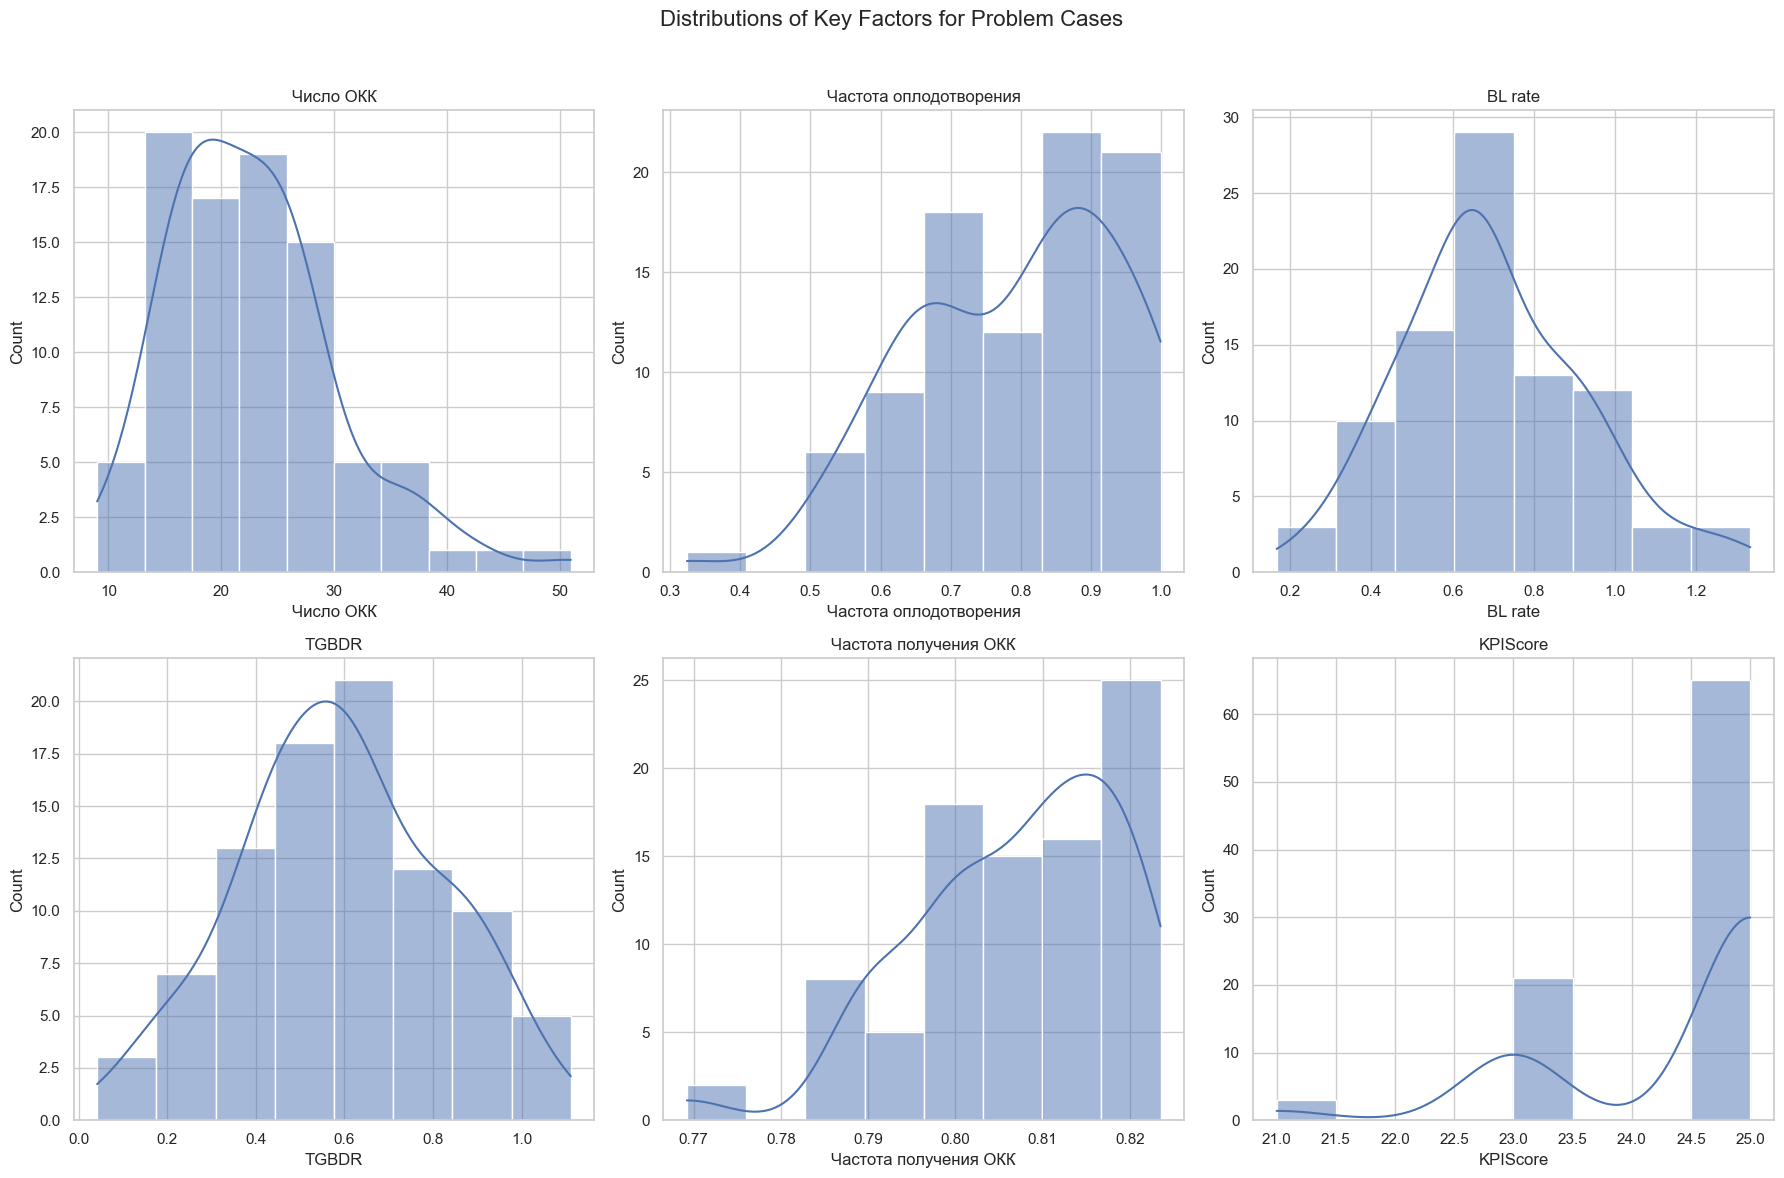

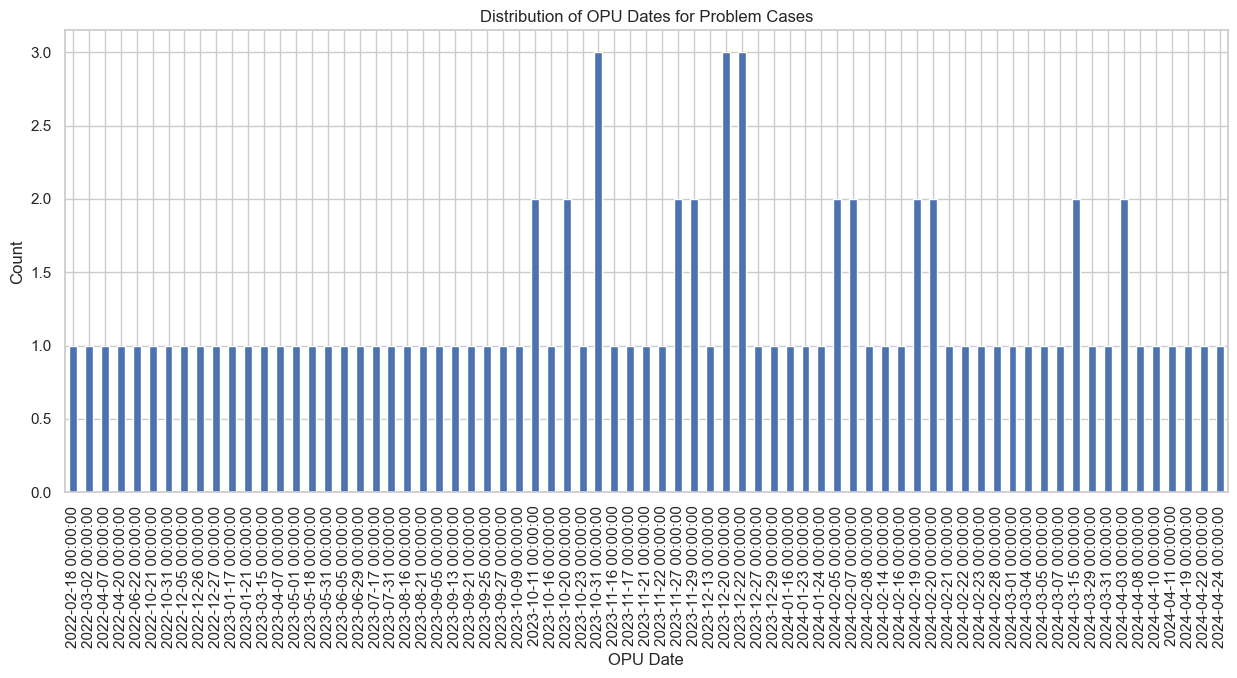

In [5]:
# Настройка стиля визуализации
sns.set(style="whitegrid")

# Построение распределений ключевых факторов для проблемных случаев
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distributions of Key Factors for Problem Cases', fontsize=16)

sns.histplot(problem_cases['Число ОКК'], kde=True, ax=axes[0, 0]).set_title('Число ОКК')
sns.histplot(problem_cases['Частота оплодотворения'], kde=True, ax=axes[0, 1]).set_title('Частота оплодотворения')
sns.histplot(problem_cases['BL rate'], kde=True, ax=axes[0, 2]).set_title('BL rate')
sns.histplot(problem_cases['TGBDR'], kde=True, ax=axes[1, 0]).set_title('TGBDR')
sns.histplot(problem_cases['Частота получения ОКК'], kde=True, ax=axes[1, 1]).set_title('Частота получения ОКК')
sns.histplot(problem_cases['KPIScore'], kde=True, ax=axes[1, 2]).set_title('KPIScore')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Построение распределения дат OPU для проблемных случаев
plt.figure(figsize=(15, 6))
problem_dates_distribution.plot(kind='bar')
plt.title('Distribution of OPU Dates for Problem Cases')
plt.xlabel('OPU Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [6]:
# Фильтрация строк, где модель предсказала беременность (1), но в реальности она не наступила (0)
problem_cases = data[(data['Исход переноса'] == 0) & (data['Исход переноса метамодель'] == 1)]

# Фильтрация строк, где модель предсказала правильно или не предсказала беременность (остальные случаи)
non_problem_cases = data[~((data['Исход переноса'] == 0) & (data['Исход переноса метамодель'] == 1))]

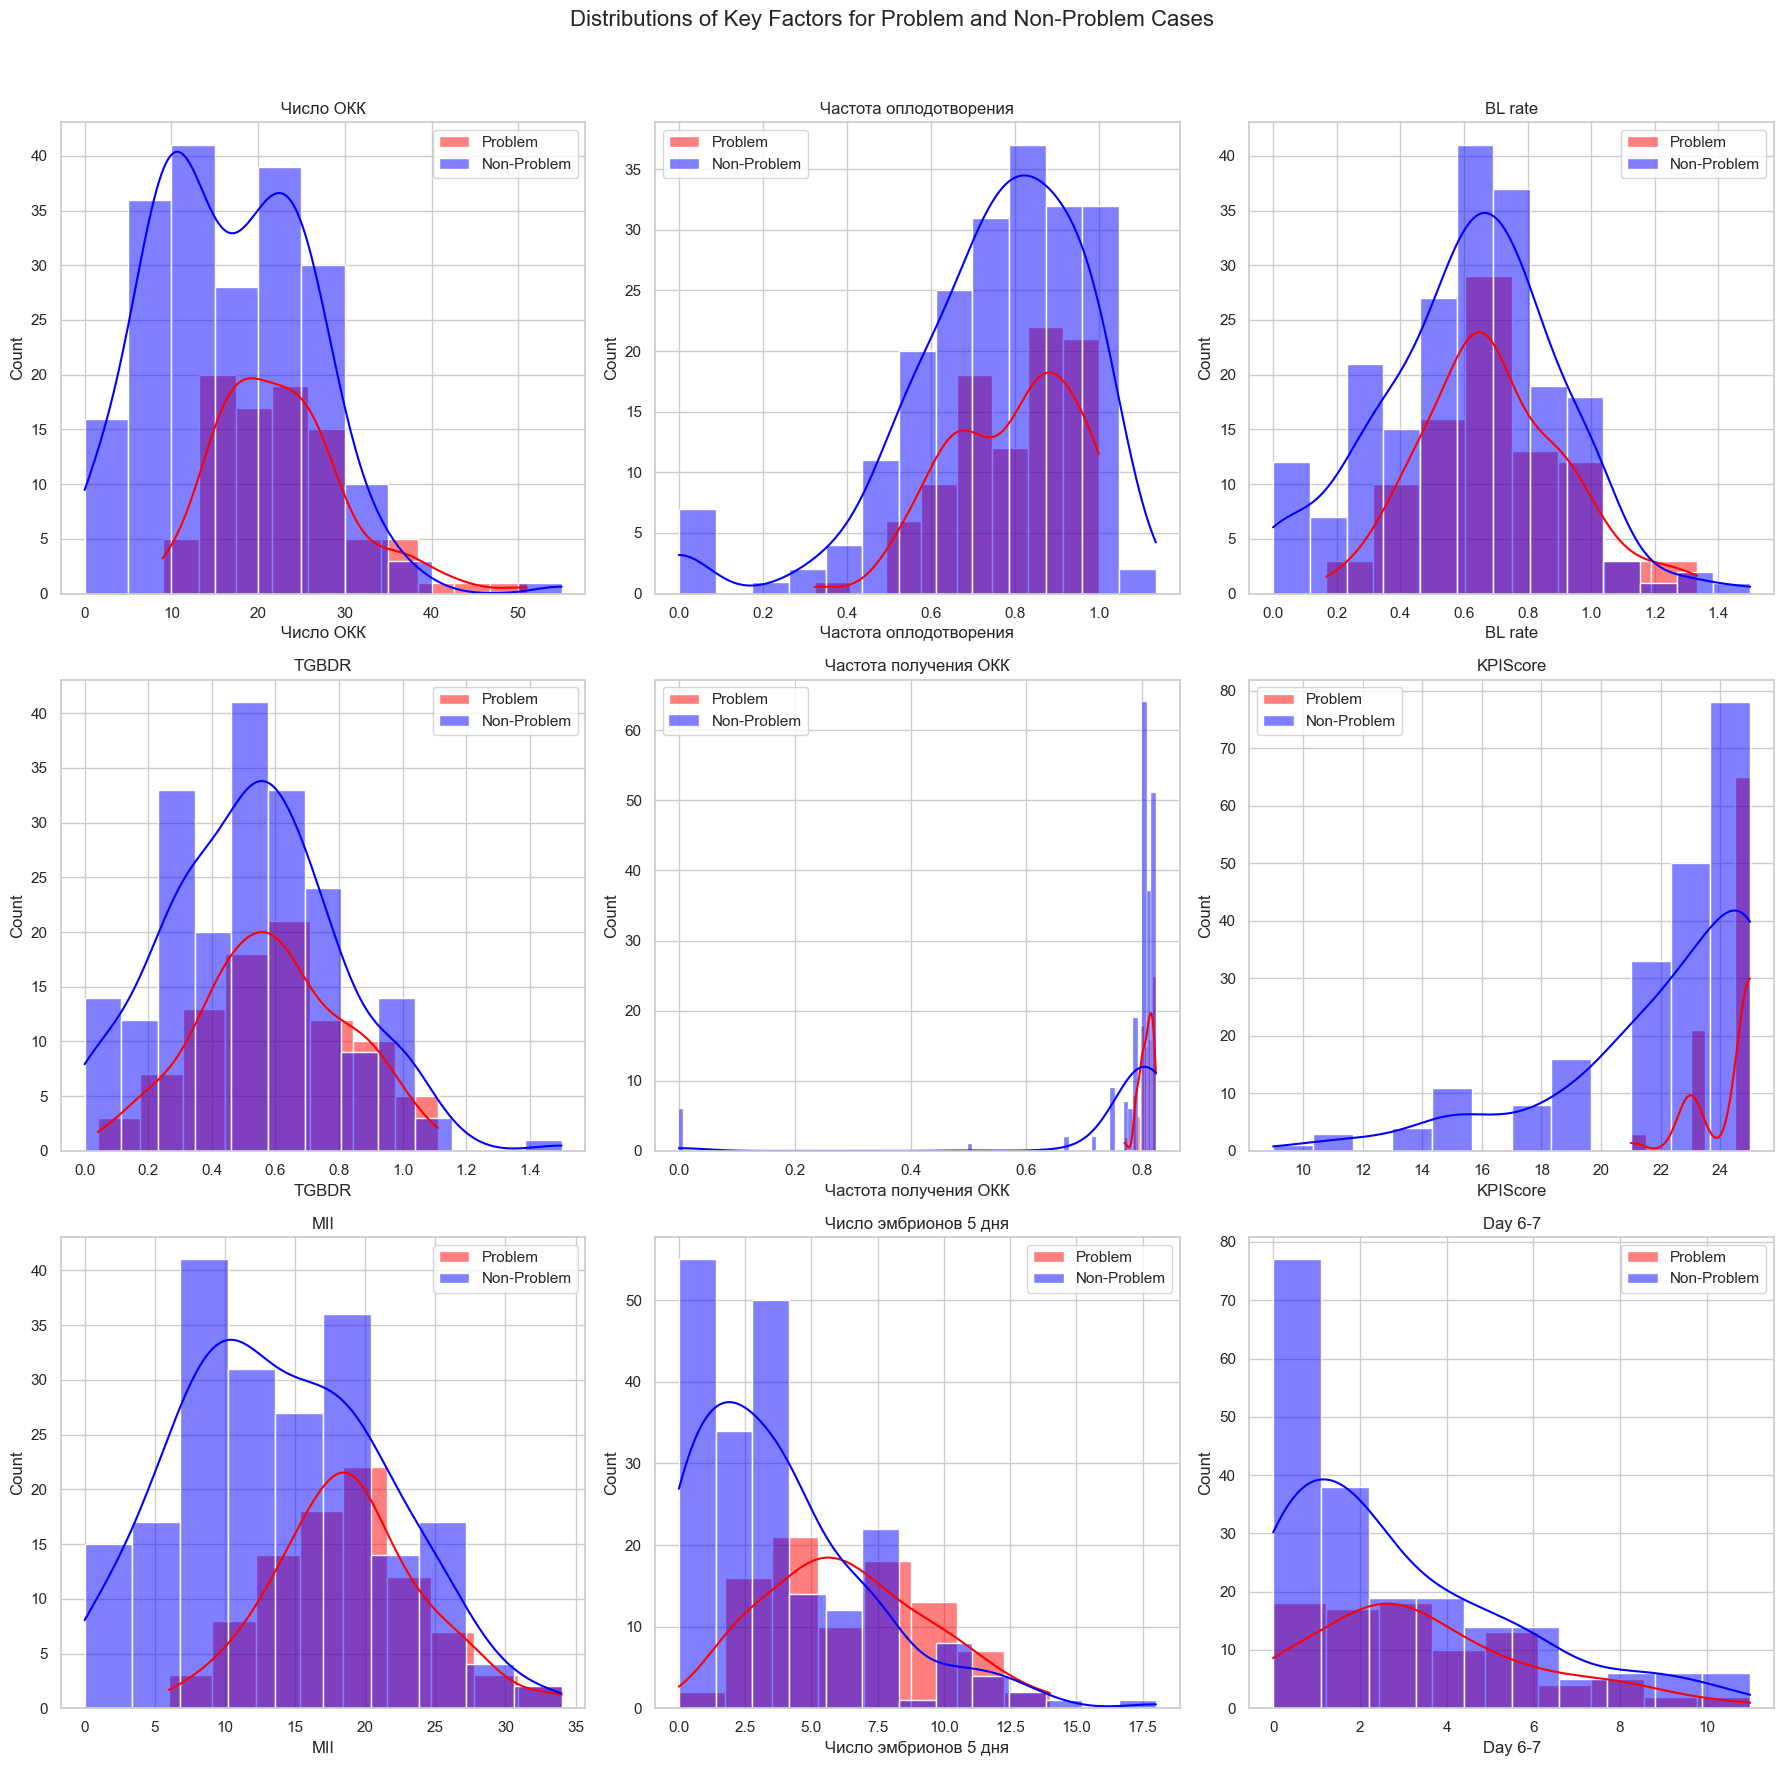

In [7]:
# Настройка стиля визуализации
sns.set(style="whitegrid")

# Построение распределений ключевых факторов для проблемных и не проблемных случаев
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Distributions of Key Factors for Problem and Non-Problem Cases', fontsize=16)

sns.histplot(problem_cases['Число ОКК'], kde=True, color='red', ax=axes[0, 0], label='Problem').set_title('Число ОКК')
sns.histplot(non_problem_cases['Число ОКК'], kde=True, color='blue', ax=axes[0, 0], label='Non-Problem')
axes[0, 0].legend()

sns.histplot(problem_cases['Частота оплодотворения'], kde=True, color='red', ax=axes[0, 1], label='Problem').set_title('Частота оплодотворения')
sns.histplot(non_problem_cases['Частота оплодотворения'], kde=True, color='blue', ax=axes[0, 1], label='Non-Problem')
axes[0, 1].legend()

sns.histplot(problem_cases['BL rate'], kde=True, color='red', ax=axes[0, 2], label='Problem').set_title('BL rate')
sns.histplot(non_problem_cases['BL rate'], kde=True, color='blue', ax=axes[0, 2], label='Non-Problem')
axes[0, 2].legend()

sns.histplot(problem_cases['TGBDR'], kde=True, color='red', ax=axes[1, 0], label='Problem').set_title('TGBDR')
sns.histplot(non_problem_cases['TGBDR'], kde=True, color='blue', ax=axes[1, 0], label='Non-Problem')
axes[1, 0].legend()

sns.histplot(problem_cases['Частота получения ОКК'], kde=True, color='red', ax=axes[1, 1], label='Problem').set_title('Частота получения ОКК')
sns.histplot(non_problem_cases['Частота получения ОКК'], kde=True, color='blue', ax=axes[1, 1], label='Non-Problem')
axes[1, 1].legend()

sns.histplot(problem_cases['KPIScore'], kde=True, color='red', ax=axes[1, 2], label='Problem').set_title('KPIScore')
sns.histplot(non_problem_cases['KPIScore'], kde=True, color='blue', ax=axes[1, 2], label='Non-Problem')
axes[1, 2].legend()

sns.histplot(problem_cases['MII'], kde=True, color='red', ax=axes[2, 0], label='Problem').set_title('MII')
sns.histplot(non_problem_cases['MII'], kde=True, color='blue', ax=axes[2, 0], label='Non-Problem')
axes[2, 0].legend()

sns.histplot(problem_cases['Число эмбрионов 5 дня'], kde=True, color='red', ax=axes[2, 1], label='Problem').set_title('Число эмбрионов 5 дня')
sns.histplot(non_problem_cases['Число эмбрионов 5 дня'], kde=True, color='blue', ax=axes[2, 1], label='Non-Problem')
axes[2, 1].legend()

sns.histplot(problem_cases['Day 6-7'], kde=True, color='red', ax=axes[2, 2], label='Problem').set_title('Day 6-7')
sns.histplot(non_problem_cases['Day 6-7'], kde=True, color='blue', ax=axes[2, 2], label='Non-Problem')
axes[2, 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
kpi_patients_df=pd.read_excel("C:/Users/User/Desktop/IVF/GGRC/Data Analytics/2024/2й-2024/Embryologist_KPI_patients.xlsx")
kpi_donor_df=pd.read_excel("C:/Users/User/Desktop/IVF/GGRC/Data Analytics/2024/2й-2024/Embryologist_KPI_donor.xlsx")
kpi_df = pd.merge(kpi_patients_df, kpi_donor_df, on='Embryologist IVF/ICSI', how='inner')
kpi_df

,OPU Number_x,Location/Agency_x,Doctor_x,Embryologist IVF/ICSI,Embryologist denudation_x,Embryologist OPU_x,Patients name_x,Age_x,Husband name_x,Oocyte source_x,...,Day 6-7_y,D5-D6-D7_y,description_y,Good quality BL_y,FR_y,BlR_y,TGBDR_y,MIIR_y,3pNR_y,DegR_y
0,205971,Europe,თამარა ნადირაშვილი (Tamara Nadirashvili),ნია ნიჟარაძე (Nia Nizharadze),ლაშა ნადირაშვილი (Lasha Nadirashvili),Nini + Gvantsa,Nadine Kirnon,45,Otto Christian,Own fresh,...,3.0,6.0,#1 5AA\n#2 5AA\n#3 5AA\n#4 6BA \n#5 5BB \n#6 5AB,5,0.750000,0.666667,0.555556,0.923077,0.000000,0.166667
1,205971,Europe,თამარა ნადირაშვილი (Tamara Nadirashvili),ნია ნიჟარაძე (Nia Nizharadze),ლაშა ნადირაშვილი (Lasha Nadirashvili),Nini + Gvantsa,Nadine Kirnon,45,Otto Christian,Own fresh,...,3.0,5.0,#1 5AA\n#2 5AA\n#3 5AA\n#4 5AA\n#5 5AA,5,0.444444,1.250000,1.250000,0.900000,0.000000,0.000000
2,205971,Europe,თამარა ნადირაშვილი (Tamara Nadirashvili),ნია ნიჟარაძე (Nia Nizharadze),ლაშა ნადირაშვილი (Lasha Nadirashvili),Nini + Gvantsa,Nadine Kirnon,45,Otto Christian,Own fresh,...,2.0,6.0,#1 5AA\n#2 5BA\n#3 5BB\n#4 6AA\n#5 5BC\n#6 5AB,4,0.833333,0.600000,0.400000,0.800000,0.000000,0.000000
3,205971,Europe,თამარა ნადირაშვილი (Tamara Nadirashvili),ნია ნიჟარაძე (Nia Nizharadze),ლაშა ნადირაშვილი (Lasha Nadirashvili),Nini + Gvantsa,Nadine Kirnon,45,Otto Christian,Own fresh,...,1.0,5.0,#1 5AA\n#2 5AA\n#3 5AA\n#4 5AA\n#5 5AA,5,0.692308,0.555556,0.555556,0.684211,0.000000,0.000000
4,205971,Europe,თამარა ნადირაშვილი (Tamara Nadirashvili),ნია ნიჟარაძე (Nia Nizharadze),ლაშა ნადირაშვილი (Lasha Nadirashvili),Nini + Gvantsa,Nadine Kirnon,45,Otto Christian,Own fresh,...,6.0,8.0,#1 5AA\n#2 5AA\n#3 5BB \n#4 5AA \n#5 5AB \n#6 ...,6,0.812500,0.615385,0.461538,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,206496,GGRC,თამარა ნადირაშვილი (Tamara Nadirashvili),სერგეი სერგეევი (Sergey Sergeev),თამარ დვალი (Dvali Tamar),ნინი ხუციშვილი ( Nini Khutsishvili),სალომე ჯაფარიძე,33,სარუხანიშვილი სანდრო-გიორგი,Own fresh,...,4.0,5.0,#3 4AA\n#1 6BA\n#2 4BA\n#5 6AA\n#8 4AA,5,0.750000,0.555556,0.555556,0.461538,0.000000,0.000000
7208,206496,GGRC,თამარა ნადირაშვილი (Tamara Nadirashvili),სერგეი სერგეევი (Sergey Sergeev),თამარ დვალი (Dvali Tamar),ნინი ხუციშვილი ( Nini Khutsishvili),სალომე ჯაფარიძე,33,სარუხანიშვილი სანდრო-გიორგი,Own fresh,...,5.0,12.0,#1 5AA\n#2 5AA\n#3 5AA\n#4 5AB\n#5 5BA\n#6 3BA...,10,0.833333,0.600000,0.500000,0.666667,0.027778,0.041667
7209,206496,GGRC,თამარა ნადირაშვილი (Tamara Nadirashvili),სერგეი სერგეევი (Sergey Sergeev),თამარ დვალი (Dvali Tamar),ნინი ხუციშვილი ( Nini Khutsishvili),სალომე ჯაფარიძე,33,სარუხანიშვილი სანდრო-გიორგი,Own fresh,...,5.0,5.0,#1 5AB \n#2 5AC \n#3 6AC \n#4 6AA\n#5 4BB,2,0.500000,0.555556,0.222222,0.750000,0.041667,0.111111
7210,206496,GGRC,თამარა ნადირაშვილი (Tamara Nadirashvili),სერგეი სერგეევი (Sergey Sergeev),თამარ დვალი (Dvali Tamar),ნინი ხუციშვილი ( Nini Khutsishvili),სალომე ჯაფარიძე,33,სარუხანიშვილი სანდრო-გიორგი,Own fresh,...,2.0,5.0,#1 4AB \n#2 5AA \n#3 4AA\n#1 5AB\n#2 5AA,5,1.000000,0.714286,0.714286,1.000000,0.000000,0.000000
